# The Cloud-Decision Algorithm

-the algorithm requires two images. a clear sky images and partial cloudy image.

-Do not need to conduct the algorithm on images between clear sky and overcast sky because PV(photovoltaic) output will be close to constants


-Algorithm will have to pull the images. The clear sky image and cloudy image must be at the same time of the day when it was taken in order to make sure the sun position is negligible 

-algorithm takes the ratio between images and compares to a threshold value typically 0.8. The threshold value varies on the sun's location

-the threshold value is significantly affected when the clouds are covering the sun otherwise, provide up to 95% accuracy in decision.


In [208]:
from skimage import io
import cv2
import matplotlib.pyplot as plt
# from skimage import color
# from skimage import data
# from pylab import *
# from PIL import Image
# from skimage import filters, data
# from skimage.transform import resize

import numpy as np

import os
os.chdir('####') 
         #file location  

In [209]:
def Rchannel(image):
    red_img = image.copy()                 
    red_img[:,:,1], red_img[:,:,2]= 0 , 0  #set blue/green channel to color black.
    return red_img

def mask(image):
    img = cv2.imread(image)
    img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    upper_blue = np.array([255,255,255])
    lower_blue = np.array([40,40,70])       #any value of blue lower than lower_blue will be darken
    mask = cv2.inRange(img2,lower_blue,upper_blue)  #create mask to apply over img2
    result = cv2.bitwise_and(img2,img2,mask = mask)
    return result

-Functions explained

-Rchannel function is to convert RGB images into R only image by zero-ing out blue channel and green channel

-mask functions uses image segmentation technique to block off lower blue pixel in the images, effectively eliminated surrounding objects except the sky pixels and cloud pixels

-img_resize is required in order to reduce the runtime. The image origin size is 2048x2048 ~ 4millions pixel

In [210]:
def cloudmapping_slow(clearsky_red_image,cloudy_red_image,para = 0.8): #assume masked images
    blank_image = np.zeros((2048,2048,3), np.uint8)
    
    for i in range(2048):        #using for loop
        for j in range(2048):
            if (clearsky_red_image[i,j][0]) == 0:    
                continue
            if (clearsky_red_image[i,j][0]/cloudy_red_image[i,j][0]) > para:

                blank_image[i,j] = [0,0,255]
            if (clearsky_red_image[i,j][0]/cloudy_red_image[i,j][0]) <= para:

                blank_image[i,j] = [255,255,255]

    return (io.imshow(blank_image))

# def img_resize ( image ):
#     image_resized = resize(image, (image.shape[0] // 4, image.shape[1] //4), anti_aliasing = True)
#     return image_resized
##resizing, one of the solution to speed up for loop

Faster method using vectorization on numpy arrays

In [211]:
def cloudmapping(clearsky_red_image,cloudy_red_image,para = 0.8): #para can vary based on sun location
    blank_image = np.zeros(clearsky_red_image.shape, np.uint8)  # Created blank image

    #The boxes store numpy arrays of pixel locations from parameter images that passed the conditions
    
    box1 = clearsky_red_image[:,:,0] / cloudy_red_image[:,:,0] < para 
    box2 = clearsky_red_image[:,:,0] == 0
    box3 = clearsky_red_image[:,:,0] / cloudy_red_image[:,:,0] > para

    #All the coordinates in the boxes are unpacked and all applied to blank image simultaneously, and changes pixel value
    #Vectorization

    blank_image[box1] = [255, 255, 255]
    blank_image[box2] = [0,0,0]
    blank_image[box3] = [0,0,255]

    return (io.imshow(blank_image))
   #Significantly reduces program duration

-When the value (of red clear sky pixel value is divided by red cloudy sky pixel value) is less than the threshold value, the pixel must be cloudy
If the ration between two images is more than threshold value it must be sky pixel

AxesImage(10.8,27.8;410.4x245.453)
---- 1.5748529434204102 seconds ----


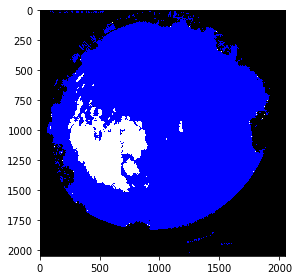

In [212]:
cloud = Rchannel((mask('pair2.jpg')))
clear = Rchannel((mask('pair2.0.jpg')))
start_time = time.time()
print(cloudmapping(clear, cloud))
print("---- %s seconds ----" %(time.time()-start_time))

AxesImage(10.8,27.8;410.4x245.453)
---- 28.62119483947754 seconds ----


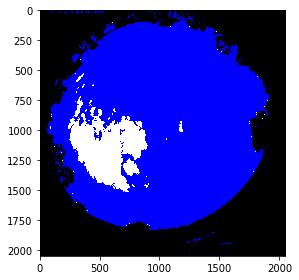

In [213]:
start_time = time.time()
###using for loop
print(cloudmapping_slow(clear, cloud))
print("---- %s seconds ----" %(time.time()-start_time))

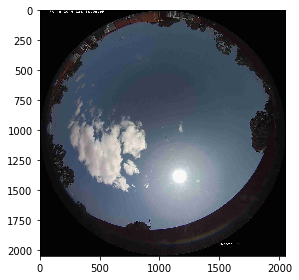

In [207]:
io.imshow('pair2.jpg')